In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 
import seaborn as sns
%matplotlib inline

sns.set(style='dark',color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("https://data.alexmattyou.repl.co/db/simpillearn-demo/Lesson-4/train.csv")
df_train.shape

(891, 12)

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [7]:
df_train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
print(df_train[df_train['Pclass']== 1]['Age'].mean())
print(df_train[df_train['Pclass']== 2]['Age'].mean())
print(df_train[df_train['Pclass']== 3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [9]:
def age_finder(data):
  age = data[0]
  pclass = data[1]
  if pd.isnull(age):
    if pclass == 1:
      return 38
    elif pclass == 2:
      return 30
    else:
      return 25
  else: return age

In [10]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_finder, axis=1)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [13]:
from sklearn import preprocessing

for x in df_train.columns: # encoding class lables to int
    if df_train[x].dtype == 'object':
        ec = preprocessing.LabelEncoder()
        ec.fit(list(df_train[x].values))
        df_train[x] = ec.transform(list(df_train[x].values))

<AxesSubplot:>

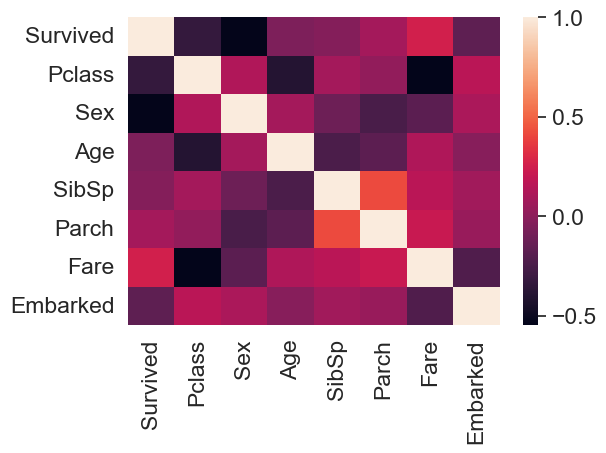

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train.corr())

In [15]:
y = df_train['Survived']
del df_train['Survived']
x = df_train

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
mod = LogisticRegression()
mod.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred = mod.predict(x_test)

<AxesSubplot:>

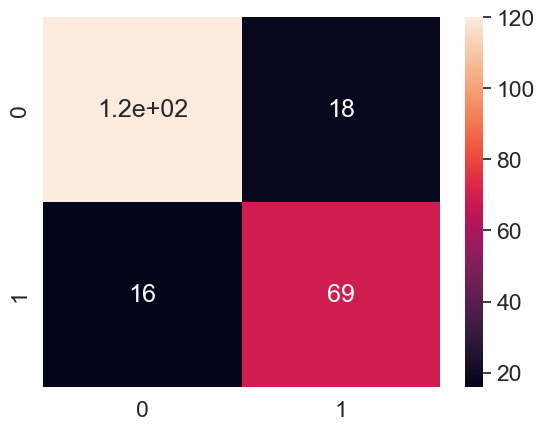

In [18]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [19]:
metrics.accuracy_score(y_test, y_pred)

0.8475336322869955

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       138
           1       0.79      0.81      0.80        85

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223

